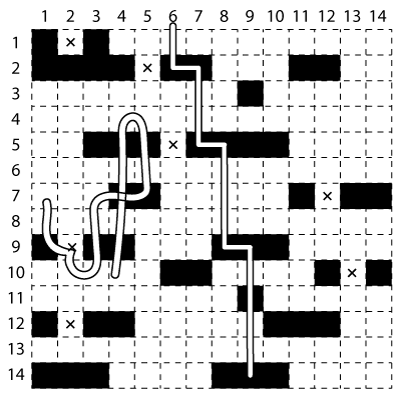

Slika kaže razpored ovir v testih. Funkcije morajo delovati za poljuben razpored ovir (predpostaviti pa smete, da se ovire ne prekrivajo) in velikost steze.

Ovire so podane kot seznam terk `(y, x0, x1)`, kjer je `y` številka vrstice, `x0` in `x1` pa skrajni levi in desni stolpec ovire. Seznam ovir ni urejen ne po vrsticah ne kakorkoli drugače. 

## 1. Prehodi

Prehodi so prosta polja, ki imajo na sosednjem levem in desnem polju oviro. Na sliki so označena s križci. Napiši funkcijo `prehodi(ovire)`, ki vrne množico koordinat prehodov v obliki parov `(y, x)`.

### Rešitev

Lahko gremo prek seznama vseh parov ovir in za vsak par preverimo, ali je med njima stisnjen prehod. Ker ovire niso urejene, bo potrebno narediti dvojno, gnezdeno zanko:

```
    for ya, xa0, xa1 in ovire:
        for yb, xb0, xb1 in ovire:
```

Za vsak preverimo, ali sta v isti vrstici in ali se druga ovira začne dve polji po koncu prve ovire. Če je tako, dodamo vmesno polje v množico.

In [1]:
def prehodi(ovire):
    preh = set()
    for ya, xa0, xa1 in ovire:
        for yb, xb0, xb1 in ovire:
            if ya == yb and xb0 == xa1 + 2:
                preh.add((ya, xa1 + 1))
    return preh

Če smo čisto strogi, to ni čisto prava rešitev: kaj, če bi bila na polju med tema ovirama zagozdena še ena ovira dolžine 1? Tega sicer nikoli nismo videvali: ovire se nikoli niso stikale. Če bi nas to skrbelo, bi lahko odšteli še vse ovire dolžine 1,

```
    return pref - {(y, x0) for y, x0, x1 in ovire if x0 == x1}
```

Vendar na to možnost nisem pomislil niti pri sestavljanju nalog, niti pri sestavljanju testov, zato ne bomo nikomur zamerili, če je rešil tako, kot zgoraj.

Še manjši detajl: spremenljivk `xa0` in `xb1` v resnici ne potrebujemo, zato bi ju lahko zamenjali s `_`.

In [2]:
def prehodi(ovire):
    preh = set()
    for ya, _, xa1 in ovire:
        for yb, xb0, _ in ovire:
            if ya == yb and xb0 == xa1 + 2:
                preh.add((ya, xa1 + 1))
    return preh

Zdaj pa kakšna boljša rešitev. Lahko, recimo, najprej razmečemo ovire po vrsticah. Sestavimo slovar, katerega ključi so številke vrstic, `y`, vrednosti pa pari začetkov in koncev ovir v teh vrstici, torej `(x0, x1)`.

```python
    vrstice = defaultdict(list)
    for y, x0, x1 in ovire:
        vrstice[y].append((x0, x1))
```

Vemo, da je lahko prehod le med dvema zaporednima ovirama. Gremo torej čez vrstice. Seznam ovir v vsaki vrstici uredimo in zdaj vemo, da je lahko ovira le med zaporednim parom. Pa imamo:

In [3]:
def prehodi(ovire):
    vrstice = defaultdict(list)
    for y, x0, x1 in ovire:
        vrstice[y].append((x0, x1))
    prehodi = set()
    for y, xs in vrstice.items():
        xs.sort()
        for (_, xa1), (xb0, _) in zip(xs, xs[1:]):
            if xb0 == xa1 + 2:
                prehodi.add((y, xa1 + 1))
    return prehodi

Zanimiva je zanka, `for (_, x0), (x1, _) in zip(xs, xs[1:])`. `xs` je seznam začetkov in koncev ovir - se pravi parov. Če naredimo `zip(xs, xs[1:])` bomo dobili pare parov. Zato jih razpakiramo v `(xa0, xa1), (xb0, xb1)`. Ker `xa0` in `xb1` ne potrebujemo, pa ju, tako kot zgoraj, zamenjamo s podčrtaji.

Še lažje pa je, če se izognemo razmetavanju po vrsticah in uredimo kar celoten seznam. Python terke ureja najprej po prvem elementu - v našem primeru so to številke vrstic -, če je prvi enak, pa po drugem, torej stolpcu. Natančno to kar potrebujemo: potem bomo šli preprosto po zaporednih ovirah v tako urejenem seznamu. Med dvema ovirama je prehod, če sta v isti vrstici in je med njima prosto polje.

In [4]:
def prehodi(ovire):
    ovire = sorted(ovire)
    preh = set()
    for (ya, _, xa1), (yb, xb0, _) in zip(ovire, ovire[1:]):
        if ya == yb and xb0 == xa1 + 2:
            preh.add((ya, xa1 + 1))
    return preh

Tule je pomembno, da napišemo `ovire = sorted(ovire)` in ne `ovire.sort()`. Funkcija `sort` sestavi nov, urejen seznam (ki mu potem dodelimo isto ime, `ovire`, vendar s tem ne spremenimo podanega seznama). Medota `sort` pa bi uredila, torej spremenilaseznam, ki smo ga podali funkciji kot argument. Tega pa ne smemo početi.

Od različice 3.10 ima Python v modulu `collections` funkcijo `pairwise`. Klic `pairwise(s)` naredi (praktično) isto kot `zip(s, s[1:])`. To nam skrajša funkcijo v

In [5]:
def prehodi(ovire):
    preh = set()
    for (ya, _, xa1), (yb, xb0, _) in pairwise(sorted(ovire)):
        if ya == yb and xb0 == xa1 + 2:
            preh.add((ya, xa1 + 1))
    return preh

In kdor se še malo znajde, napiše kar

In [6]:
def prehodi(ovire):
    return {(ya, xa1 + 1)
            for (ya, _, xa1), (yb, xb0, _) in pairwise(sorted(ovire))
            if ya == yb and xb0 == xa1 + 2}

## 2. Nadloga

Nek kolesar obvlada veščino voženj po ovirah. Napiši funkcijo `nadlezna_ovira(ovire, y, x, pot)`, ki prejme ovire, začetne koordinate kolesarja in pot v obliki niza znakov `<`, `>`, `^` in `v`. Vrne naj oviro, na kateri je kolesar preživel največ "potez".

Klic `nadlezna_ovira(ovire, 10, 4, "^^^^^^>vvv<<vvv<^<^^")`, ki opisuje (levo) pot na sliki, vrne `(7, 4, 5)`, saj je bil kolesar na njej trikrat (najprej na poti gor, potem pa še dvakrat zapored, ko je šel levo prek ovire).

Pot se nikoli ne začne na oviri, lahko pa se na njej konča.

Če kolesar ne naleti na nobeno oviro, naj funkcija vrne `None`. Če je enako nadležnih več ovir, lahko vrne poljubno izmed njih.

### Rešitev

Kolesarja bo potrebno voziti okrog. To lahko počnemo tako

```python
    for smer in pot:
        if smer == "<":
            x -= 1
        elif smer == ">":
            x += 1
        elif smer == "^":
            y -= 1
        elif smer == "v":
            y += 1
```

ali pa kar tako:

```python
    for smer in pot:
        x, y = {"<": (x - 1, y), "^": (x, y - 1), "v": (x, y + 1), ">": (x + 1, y)}[smer]
```

V slovarju `podrte` bomo šteli, kolikokrat je podrl katero oviro. Ključi bodo trojke z ovirami, vrednosti števci. Da se ne hecamo po nepotrebnem z if-i, bomo uporabili `defaultdict(int)`.

```python
    podrte = defaultdict(int)
    for smer in pot:
        x, y = {"<": (x - 1, y), "^": (x, y - 1), "v": (x, y + 1), ">": (x + 1, y)}[smer]
        for yo, x0, x1 in ovire:
            if yo == y and x0 <= x <= x1:
                podrte[(y, x0, x1)] += 1
```

Na koncu je potrebno poiskati ključ, ki mu pripada največja vrednost. Če je slovar prazen, pa vrniti `None`.

Dolga različica funkcije je

In [7]:
def nadlezna_ovira(ovire, y, x, pot):
    podrte = defaultdict(int)
    for smer in pot:
        if smer == "<":
            x -= 1
        elif smer == ">":
            x += 1
        elif smer == "^":
            y -= 1
        elif smer == "v":
            y += 1
        for yo, x0, x1 in ovire:
            if yo == y and x0 <= x <= x1:
                podrte[(y, x0, x1)] += 1

    if not podrte:
        return None

    naj = None
    for ovira in podrte:
        if naj is None or podrte[ovira] > podrte[naj]:
            naj = ovira
    return naj

Krajše pa gre tako:

In [8]:
def nadlezna_ovira(ovire, y, x, pot):
    podrte = defaultdict(int)
    for smer in pot:
        x, y = {"<": (x - 1, y), "^": (x, y - 1), "v": (x, y + 1), ">": (x + 1, y)}[smer]
        for yo, x0, x1 in ovire:
            if yo == y and x0 <= x <= x1:
                podrte[(y, x0, x1)] += 1

    return max(podrte, key=podrte.get, default=None)

## 3. Odstranjevanje

Po (pre)dolgih letih so zdaj končno zamenjali vodjo MOL-ovega Oddelka za gospodarske dejavnosti in motorni promet. (To ni šala, kar preverite!)

Napiši funkcijo `odstrani(ovire, stolpci)`, ki prejme seznam ovir in številk stolpcev. Iz seznama naj odstrani vse ovire, ki zapirajo kateregakoli od podanih stolpcev. Funkcija ne sme vrniti ničesar: spreminjati mora podani seznam.

### Rešitev

Najpreprosteje je tako:


In [9]:
def odstrani(ovire, stolpci):
    i = 0
    while i < len(ovire):
        for stolpec in stolpci:
            if ovire[i][1] <= stolpec <= ovire[i][2]:
                del ovire[i]
                break
        else:
            i += 1

Čez ovire gremo z zanko `while`: `i` bo vseboval indeks ovire. Za vsako oviro gremo čez vse stolpce. Če vidimo, da ovira pokriva ta stolpec, pobrišemo oviro in prekinemo zanko. Če pa se zanka `for` izteče brez `break`, povečamo `i`, da bomo nadaljevali z naslednjo oviro.

Ta detajl je pomemben: `i` povečujemo le, če ne pobrišemo ovire. Če jo pobrišemo, se na i-to mesto namreč postavi naslednja ovira (kot smo vsaj enkrat, nemara pa tudi večkrat videli na predavanjih), torej po brisanju `i`-te ovire spet preverimo (novo) oviro na `i`-tem mestu. Iz istega razloga rešitev v slogu

```python
def odstrani(ovire, stolpci):
    for ovira in ovire:
        for stolpec in stolpci:
            if ovire[i][1] <= stolpec <= ovire[i][2]:
                ovire.remove(ovira)
                break
```

ne bi delovala, saj bi zanka po brisanju neke ovire preskočila oviro, ki ji sledi.

Zanki lahko tudi obrnemo: gremo čez stolpec in pobrišemo ovire v tem stolpcu.

In [10]:
def odstrani(ovire, stolpci):
    for stolpec in stolpci:
        i = 0
        while i < len(ovire):
            if ovire[i][1] <= stolpec <= ovire[i][2]:
                del ovire[i]
            else:
                i += 1

Lahko pa si napišemo pomožno funkcijo `zapira(ovira, stolpci)`, ki preveri, ali ovira zapira katerega od podanih stolpcev.

In [11]:
def zapira(ovira, stolpci):
    y, x0, x1 = ovira
    for stolpec in stolpci:
        if x0 <= stolpec <= x1:
            return True
    return False

Z njo si poenostavimo logiko zanko v `odstrani`.

In [12]:
def odstrani(ovire, stolpci):
    i = 0
    while i < len(ovire):
        if zapira(ovire[i], stolpci):
            del ovire[i]
        else:
            i += 1

Funkcijo `zapira` je možno napisati tudi krajše.

In [13]:
def zapira(ovira, stolpci):
    return any(ovira[1] <= stolpec <= ovira[2] for stolpec in stolpci)

Če je tako, pa funkcije niti ne potrebujemo, temveč lahko `zapira` stlačimo kar v `odstrani`.

In [14]:
def odstrani(ovire, stolpci):
    i = 0
    while i < len(ovire):
        _, x0, x1 = ovire[i]
        if any(x0 <= stolpec <= x1 for stolpec in stolpci):
            del ovire[i]
        else:
            i += 1

Drugačen pristop je, da ne brišemo elementov obstoječega seznama, temveč sestavimo nov seznam, ki vsebuje le preostale ovire. Na koncu funkcije pa preprosto zamenjamo vse elemente seznama `ovire` s temi.

In [15]:
def odstrani(ovire, stolpci):
    ostale = []
    for ovira in ovire:
        if not zapira(ovira, stolpci):
            ostale.append(ovira)
    ovire[:] = ostale

Ali pa kar

In [16]:
def odstrani(ovire, stolpci):
    ovire[:] = [ovira for ovira in ovire if not zapira(ovira, stolpci)]

Če se nam ne da pisati funkcije `zapira`, pa je celotna rešitev kar

In [17]:
def odstrani(ovire, stolpci):
    ovire[:] = [ovira for ovira in ovire
                if not any(ovira[1] <= stolpec <= ovira[2] for stolpec in stolpci)]

## 4. Žaba

Tako kot veverice si tudi žabe ne upajo stopiti na kolesarsko pot, temveč se premikajo zgolj po ovirah. Žaba lahko hodi levo in desno po oviri, skače pa vedno samo naravnost navgor. (Zaradi močnega vetra v to smer.)

Žaba želi priti na vrh poti in pri tem delati čim krajše skoke. Za pot z ovire `(14, 8, 10)` bo morala narediti vsaj en skok dolžine 3; primer možne takšne poti je na sliki.

Napiši funkcijo `najdaljsi_skok(ovire, ovira)`, ki prejme seznam ovir in začetno oviro (kot terko (y, x0, x1)), ter vrne najdaljši skok, ki ga bo morala opraviti žaba, če izbere pot, pri kateri je najdaljši skok čim krajši.

V pomoč: v datoteki s testi je funkcija `naprej(ovire, ovira)`, ki vrne vse ovire, na katere je možno skočiti z ovira.
Pazi (1): Med deveto in peto vrstico so tri prazne vrste, zato se šteje, da je skok med njima dolg 3 (ne 4!).

Pazi (2): žaba naj ne skače kar brezglavo na najbližjo oviro! Če iz `(14, 8, 10)` skoči na `(12, 10, 12)` in potem na `(10, 12, 12)`, se zafrkne, saj mora potem z `(10, 12, 12)` narediti skok dolžine 7!

### Rešitev

In [18]:
def naprej(ovire, ovira):
    yo, xo0, xo1 = ovira
    return [(y, x0, x1) for y, x0, x1 in ovire
            if y < yo and (x0 <= xo0 <= x1 or xo0 <= x0 <= xo1)]


def najdaljsi_skok(ovire, ovira):
    naj = ovira[0] - 1
    for nasl in naprej(ovire, ovira):
        najt = max(ovira[0] - nasl[0] - 1, najdaljsi_skok(ovire, nasl))
        if najt < naj:
            naj = najt
    return naj

Najkrajši skok je, za začetek, skok s te ovire do konca, `ovira[0] - 1`.

Nato gremo čez vse ovire, na katere lahko skočimo (`nasl`). Skok do ovire `nasl` je dolg `ovira[0] - nasl[0] - 1`. Najdaljši skok s te ovire, `nasl`, do konca, bo `najdaljsi_skok(ovire, nasl)`. Najdaljši skok, če nadaljujemo po prek ovire `nasl`, bo tisto, kar od tega dvojega je večje - sam skok do `nasl` ali pa eden od skokov naprej. Torej `najt = max(ovira[0] - nasl[0] - 1, najdaljsi_skok(ovire, nasl))`. Če je to manjše od najmanjšega skoka doslej, si zapomnimo to dolžino. In jo na koncu vrnemo.

In [19]:
def najdaljsi_skok(ovire, ovira):
    naj = ovira[0] - 1
    for nasl in naprej(ovire, ovira):
        najt = max(ovira[0] - nasl[0] - 1, najdaljsi_skok(ovire, nasl))
        if najt < naj:
            naj = najt
    return naj

Če se komu ne da tipkati, pa napiše

In [20]:
def najdaljsi_skok(ovire, ovira):
    return min((max(ovira[0] - nasl[0] - 1, najdaljsi_skok(ovire, nasl))
                for nasl in naprej(ovire, ovira)),
               default=ovira[0] - 1)

## 5. Anarhist

Napiši razred `Kolesar`.

- Konstruktor prejme argumente `(ovire, y, x)`, to je seznam ovir in začetno točko. Začetna točka gotovo ni na oviri. Razred sme v kasnejših metodah spreminjati podani seznam.
- Metoda `premik(smer)` ga premakne s trenutne točke za eno polje v podani smeri (<, >, ^ ali v). Če je na tistem polju slučajno ovira, jo kolesar zdrobi v sončni prah. Potem te ovire ni več.
- Metoda `lokacija()` vrne trenutno lokacijo kolesarja v obliki terke `(y, x)`.
- Metoda `uspesnost()` vrne število ovir, ki jih je kolesar uničil doslej.

Kolesar, ki bi opravil (levo) pot na sliki, bi pri tem uničil štiri ovire.

### Rešitev

Ker naloga pravi, da smemo spreminjati podani seznam, ga pač spreminjajmo.

In [21]:
class Kolesar:
    def __init__(self, ovire, y, x):
        self.x = x
        self.y = y
        self.ovire = ovire
        self.unicenih = 0

    def premik(self, smer):
        dx, dy = {"<": (-1, 0), "^": (0, -1), "v": (0, 1), ">": (1, 0)}[smer]
        self.x += dx
        self.y += dy
        for y, x0, x1 in self.ovire:
            if self.y == y and x0 <= self.x <= x1:
                self.ovire.remove((y, x0, x1))
                self.unicenih += 1
                break

    def lokacija(self):
        return (self.y, self.x)

    def uspesnost(self):
        return self.unicenih


Še bolj prav bi bilo, če bi namesto `remove` uporabili `del` - ker je hitrejše in ker nas ne bi nič stalo poznati indeks elementa (z izjemo klica funkcije `enumerate` in dodatne spremenljivke `i`). Vendar ovir ni tako veliko, da bi se splačalo komplicirati s tem.

Lahko pa se lotimo z druge strani: namesto, da brišemo ovire, hranimo množico razbitih ovir. Nekaj v tem slogu:

In [22]:
class Kolesar:
    def __init__(self, ovire, y, x):
        self.x = x
        self.y = y
        self.ovire = ovire
        self.unicene = set()

    def premik(self, smer):
        dx, dy = {"<": (-1, 0), "^": (0, -1), "v": (0, 1), ">": (1, 0)}[smer]
        self.x += dx
        self.y += dy
        for y, x0, x1 in ovire:
            if y == self.y and x0 <= self.x <= x1:
                self.unicene.add((y, x0, x1))
                break

    def lokacija(self):
        return (self.y, self.x)

    def uspesnost(self):
        return len(self.unicene)

## Vse skupaj

Zanimivo, kako jedrnato je bilo možno rešiti tale izpit.

In [23]:
# 1

def prehodi(ovire):
    return {(ya, xa1 + 1)
            for (ya, _, xa1), (yb, xb0, _) in pairwise(sorted(ovire))
            if ya == yb and xb0 == xa1 + 2}


# 2

def nadlezna_ovira(ovire, y, x, pot):
    podrte = defaultdict(int)
    for smer in pot:
        x, y = {"<": (x - 1, y), "^": (x, y - 1), "v": (x, y + 1), ">": (x + 1, y)}[smer]
        for yo, x0, x1 in ovire:
            if yo == y and x0 <= x <= x1:
                podrte[(y, x0, x1)] += 1

    return max(podrte, key=podrte.get, default=None)


# 3 

def odstrani(ovire, stolpci):
    ovire[:] = [ovira for ovira in ovire
                if not any(ovira[1] <= stolpec <= ovira[2] for stolpec in stolpci)]

    
# 4

# Funkcija `naprej` je podana
def naprej(ovire, ovira):
    yo, xo0, xo1 = ovira
    return [(y, x0, x1) for y, x0, x1 in ovire
            if y < yo and (x0 <= xo0 <= x1 or xo0 <= x0 <= xo1)]

def najdaljsi_skok(ovire, ovira):
    return min((max(ovira[0] - nasl[0] - 1, najdaljsi_skok(ovire, nasl))
                for nasl in naprej(ovire, ovira)),
               default=ovira[0] - 1)


# 5

class Kolesar:
    def __init__(self, ovire, y, x):
        self.x = x
        self.y = y
        self.ovire = ovire
        self.unicene = set()

    def premik(self, smer):
        dx, dy = {"<": (-1, 0), "^": (0, -1), "v": (0, 1), ">": (1, 0)}[smer]
        self.x += dx
        self.y += dy
        for y, x0, x1 in ovire:
            if y == self.y and x0 <= self.x <= x1:
                self.unicene.add((y, x0, x1))
                break

    def lokacija(self):
        return (self.y, self.x)

    def uspesnost(self):
        return len(self.unicene)